# Introduction to ScikitLearn (sklearn)

Contents:

    0. End-to-end Scikit-Learn workflow
    1. Getting the data ready
    2. Choose the right estimator/algorithm for our problem
    3. Fit the estimator/algorithm for our problems
    4. Evaluating a model
    5. Improve a model
    6. Save and load a trained model
    7. Put it all together

## 0. End-to-end Scikit-Learn Workflow

In [1]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)

# Create y (labels)
y = heart_disease['target']

In [3]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [7]:
y_test

239    0
16     1
238    0
77     1
6      1
      ..
56     1
67     1
12     1
47     1
136    1
Name: target, Length: 61, dtype: int64

In [8]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [9]:
clf.score(X_test, y_test)

0.7377049180327869

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.61      0.68        28
           1       0.72      0.85      0.78        33

    accuracy                           0.74        61
   macro avg       0.75      0.73      0.73        61
weighted avg       0.74      0.74      0.73        61



In [11]:
confusion_matrix(y_test, y_preds)

array([[17, 11],
       [ 5, 28]], dtype=int64)

In [12]:
accuracy_score(y_test, y_preds)

0.7377049180327869

In [13]:
# 5. Improve our model
# Try different amount of n_estimators
import numpy as np
np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} n_estimators...')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%')

Trying model with 10 n_estimators...
Model accuracy on test set: 73.77%
Trying model with 20 n_estimators...
Model accuracy on test set: 73.77%
Trying model with 30 n_estimators...
Model accuracy on test set: 67.21%
Trying model with 40 n_estimators...
Model accuracy on test set: 72.13%
Trying model with 50 n_estimators...
Model accuracy on test set: 72.13%
Trying model with 60 n_estimators...
Model accuracy on test set: 73.77%
Trying model with 70 n_estimators...
Model accuracy on test set: 70.49%
Trying model with 80 n_estimators...
Model accuracy on test set: 75.41%
Trying model with 90 n_estimators...
Model accuracy on test set: 73.77%


In [14]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [15]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.7377049180327869

## 1. Getting our data ready to be used with machine learning

3 main things that we have to do:

    1. Split the data into features and labels (X and y)
    2. FIlling (imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (feature encoding)

In [16]:
# Standard Imports
import numpy as nup
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

In [19]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure its all numerical

In [23]:
car_sales_extended = pd.read_csv('car-sales-extended.csv')
car_sales_extended.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
len(car_sales_extended)

1000

In [25]:
car_sales_extended.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
# Split into X/y
X = car_sales_extended.drop('Price', axis=1)
y = car_sales_extended['Price']

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [28]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [29]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [30]:
# dummies method
dummies = pd.get_dummies(car_sales_extended[['Make', 'Colour', 'Doors']])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False


In [31]:
# refit the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 Dealing with Missing Data

    1. Imputing - filling the missing values with some data
    2. Removing samples altogether

In [33]:
car_sales_missing_extended = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing_extended

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [34]:
# Check for missing values
car_sales_missing_extended.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [35]:
car_sales_missing_extended.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

### Filling missing data using pandas

In [36]:
# filling 'Make' column with 'missing'
car_sales_missing_extended['Make'].fillna('missing', inplace=True)

# filling 'Colour' column with 'missing'
car_sales_missing_extended['Colour'].fillna('missing', inplace=True)

# filling 'Odometer (KM)' column with mean()
car_sales_missing_extended['Odometer (KM)'].fillna(car_sales_missing_extended['Odometer (KM)'].mean(), inplace=True)

# filling 'Doors' column with 4
car_sales_missing_extended['Doors'].fillna(4, inplace=True)

In [37]:
car_sales_missing_extended.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [38]:
car_sales_missing_extended.dropna(inplace=True)

In [39]:
car_sales_missing_extended.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

### Filling missing data using Scikit Learn

In [40]:
car_sales_missing_extended = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing_extended.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [41]:
car_sales_missing_extended.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
car_sales_missing_extended.dropna(subset=['Price'], inplace=True)

In [43]:
X = car_sales_missing_extended.drop('Price', axis=1)
y = car_sales_missing_extended['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
from sklearn.impute import SimpleImputer

# categorical imputer
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')

# door column imputer
door_imputer = SimpleImputer(strategy='constant', fill_value=4)

num_imputer = SimpleImputer(strategy='mean')

In [45]:
# column features
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_feature = ['Odometer (KM)']

In [46]:
from sklearn.compose import ColumnTransformer

# transformations to perform
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_feature)
])

In [47]:
# find values to fill and transform training data
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)
filled_X_train

array([['Toyota', 'Black', 4.0, 86696.0],
       ['Toyota', 'Black', 4.0, 20714.0],
       ['Toyota', 'White', 4.0, 134415.0],
       ...,
       ['Honda', 'Blue', 4.0, 224900.0],
       ['missing', 'White', 3.0, 19482.0],
       ['Honda', 'Blue', 4.0, 199833.0]], dtype=object)

In [48]:
filled_X_train_df = pd.DataFrame(filled_X_train, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
filled_X_test_df = pd.DataFrame(filled_X_test, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
filled_X_train_df

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Black,4.0,86696.0
1,Toyota,Black,4.0,20714.0
2,Toyota,White,4.0,134415.0
3,Toyota,Green,4.0,130710.230137
4,Honda,White,4.0,145850.0
...,...,...,...,...
755,Nissan,Blue,4.0,111256.0
756,Honda,White,4.0,246079.0
757,Honda,Blue,4.0,224900.0
758,missing,White,3.0,19482.0


In [49]:
# checking for missing data
filled_X_train_df.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [50]:
filled_X_test_df.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [51]:
# check original
car_sales_missing_extended.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [52]:
filled_X_train_df.head()

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Black,4.0,86696.0
1,Toyota,Black,4.0,20714.0
2,Toyota,White,4.0,134415.0
3,Toyota,Green,4.0,130710.230137
4,Honda,White,4.0,145850.0


In [53]:
# turning our data into numerical data just like what we did with the pandas
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough', sparse_threshold=0)

transformed_X_train = transformer.fit_transform(filled_X_train_df)
transformed_X_test = transformer.transform(filled_X_test_df)
transformed_X_train

array([[0.0, 0.0, 0.0, ..., 1.0, 0.0, 86696.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 20714.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 134415.0],
       ...,
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 224900.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 19482.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 199833.0]], dtype=object)

In [54]:
# fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.09497633411335504

## 2. Choosing the right estimator/algorithm for your problem

Some things to take note:
    * Sklearn refers to machine learning model, algorithms as estimators
    * Classification problem - predicting a category
    * Regression problem - predicting a number

Guide on what estimator to use
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

California Housing dataset https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [55]:
# Get california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [56]:
housing_df = pd.DataFrame(housing['data'], columns=[housing['feature_names']])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [57]:
housing_df['target'] = housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [58]:
# import estimator
from sklearn.linear_model import Ridge

# set a seed
np.random.seed(42)

# create the data
X = housing_df.drop('target', axis=1, level=0)
y = housing_df['target']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fit
model = Ridge()
model.fit(X_train, y_train)

# evaluate the model
model.score(X_test, y_test)

0.5758549611440126

Trying out a different model

In [59]:
# import estimator
from sklearn.ensemble import RandomForestRegressor

# set a seed
np.random.seed(42)

# create the data
X = housing_df.drop('target', axis=1, level=0)
y = housing_df['target']

# flatten y
y = np.ravel(y)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fit
model = RandomForestRegressor()
model.fit(X_train, y_train)

# evaluate the model
model.score(X_test, y_test)

0.8065734772187598

### 2.2 Choosing estimators for classification problem

Refer to the map again
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [60]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
len(heart_disease)

303

Trying out LinearSVC

In [62]:
# import estimator
from sklearn.svm import LinearSVC

# set a seed
np.random.seed(42)

# create the data
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fit
clf = LinearSVC(dual='auto')
clf.fit(X_train, y_train)

# evaluate the model
clf.score(X_test, y_test)

0.8688524590163934

Trying out ensembles

In [63]:
# import estimator
from sklearn.ensemble import RandomForestClassifier

# set a seed
np.random.seed(42)

# create the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fit
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# evaluate the model
clf.score(X_test, y_test)

0.8524590163934426

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

In [64]:
# import estimator
from sklearn.ensemble import RandomForestClassifier

# set a seed
np.random.seed(42)

# create the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fit
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# evaluate the model
clf.score(X_test, y_test)

0.8524590163934426

In [65]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [66]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Making predictions using a machine laerning model

In [67]:
# Using .predict()
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [68]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [69]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
clf.score(X_test, y_test)

0.8524590163934426

In [71]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_preds, y_test)

0.8524590163934426

In [73]:
# Using .predict_proba()
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [74]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [75]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [76]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [77]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [78]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1, level=0)
y = housing_df['target']

y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [79]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [80]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

## 4. Evaluating a machine learning model

Read about it here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model using the score method

In [81]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [82]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8524590163934426

Trying out the .score() on a regression problem

In [83]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [84]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop('target', axis=1, level=0)
y = housing_df['target']
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8065734772187598

### 4.2 Evaluating a model using scoring parameters

In [85]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [87]:
np.random.seed(42)
single_score = clf.score(X_test, y_test)
cross_val_mean = np.mean(cross_val_score(clf, X, y, cv=5))

single_score, cross_val_mean

(0.8524590163934426, 0.8248087431693989)

### 4.2.1 Classification model evaluation metrics

**Accuracy**

In [88]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf, X, y, cv=5)

In [90]:
np.mean(cross_val_score)

0.8248087431693989

In [91]:
print(f'Heart Disease Classifier Cross Validated Accuracy {np.mean(cross_val_score) * 100:.2f}%')

Heart Disease Classifier Cross Validated Accuracy 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

    - Area Under Curve
    - ROC Curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

    - true positive = when a model predicts 1 when truth is 1
    - false positive = when model predicts 1 when truth is 0
    - true negative = when model predicts 0 when truth is 0
    - false positive = when model predicts 1 when truth is 0

In [92]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [93]:
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [94]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [95]:
# calculate for the tpr, fpr and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

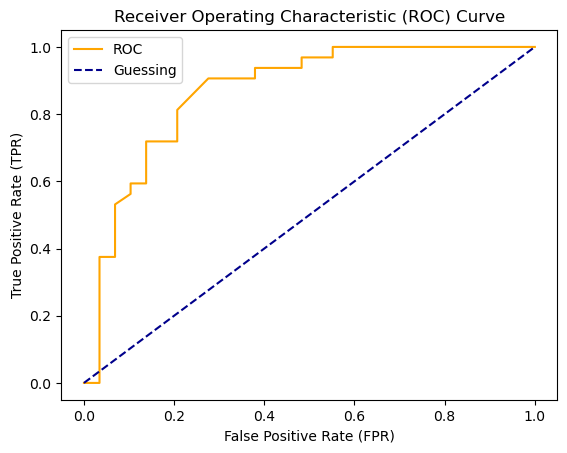

In [96]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curves(fpr, tpr):
    """
    Plots ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model
    """
    
    # Plot the roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    
    # Plot a line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', label='Guessing', linestyle='--')

    # Customize the plot
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curves(fpr, tpr)

In [97]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

**Confusion Matrix**

In [98]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [99]:
pd.crosstab(y_test, y_preds, rownames=['Actual Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [100]:
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

<Axes: >

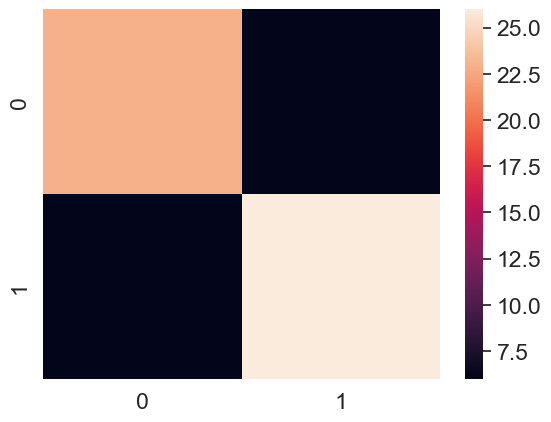

In [101]:
import seaborn as sns

sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)

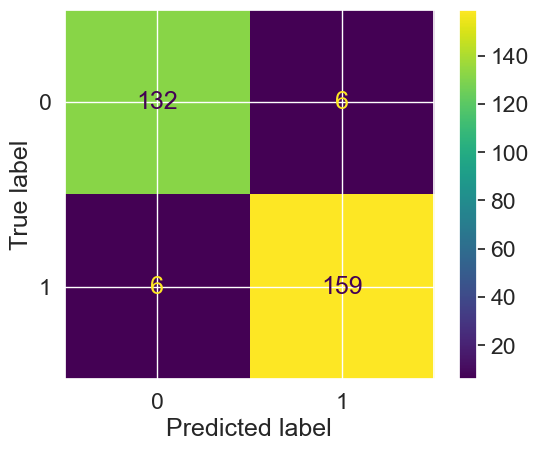

In [102]:
# Displaying Confusion Matrix using sklearn
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

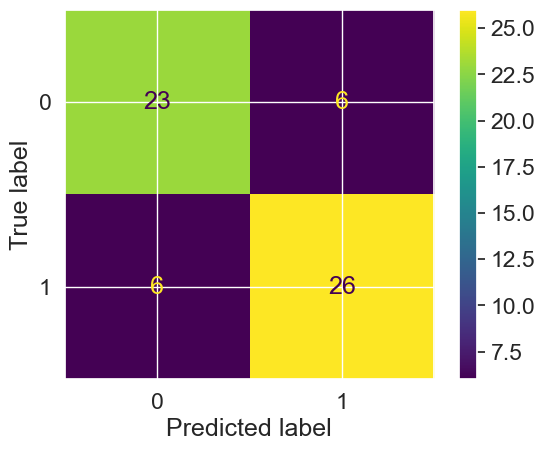

In [103]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

**Classification Report**

In [104]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



### 4.2.2 Regression Model Evaluation Metrics

**R Squared**
The coefficient of determination, or R2 , is a measure that provides information about the goodness of fit of a model. In the context of regression it is a statistical measure of how well the regression line approximates the actual data.

In [105]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [108]:
# R^2 Score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = housing_df.drop('target', axis=1, level=0)
y = housing_df['target']

y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [109]:
model.score(X_test, y_test)

0.7987628070247544

In [110]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_preds)

0.7987628070247544

**Mean Absolute Error** The difference between the ac

In [112]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true=y_test, y_pred=y_preds)

0.3260470836240312

In [113]:
df = pd.DataFrame({ 'actual values' : y_test, 'predicted values' : y_preds })
df['difference'] = df['actual values'] - df['predicted values']
df

,actual values,predicted values,difference
0,0.53300,0.65642,-0.12342
1,3.84600,3.55590,0.29010
2,1.62100,1.29293,0.32807
3,2.41400,2.60497,-0.19097
4,2.21500,2.58403,-0.36903
...,...,...,...
4123,0.99300,1.14230,-0.14930
4124,1.35300,1.47021,-0.11721
4125,0.94600,1.48325,-0.53725
4126,5.00001,4.98534,0.01467


In [115]:
np.abs(df['difference']).mean()

0.3260470836240312

**Mean Squared Error**